<a href="https://colab.research.google.com/github/rawatkarankr99/Capstone-Project-2/blob/main/Individual_Notebook_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import GridSearchCV

from prettytable import PrettyTable,ALL

import warnings
warnings.filterwarnings("ignore")

## **Reading Data**

In [ ]:
# Importing the dataset.
original_data=pd.read_csv('/content/drive/MyDrive/Alma Better/Modules/Capstone Projects/Regression/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
# Checking dataset information.
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### **Checking missing values**

In [ ]:
original_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Inference** : There are no missing values present in the dataset.

In [ ]:
# Checking Numerical Features
original_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Let's create a copy of the original dataset so that changes don't reflect in that.
data=original_data.copy()

## **EDA**

### **Checking Dependent Variable**

**The response variable is "Rented Bike Count" as according to problem job is to find the bike count required in each hour. Let's explore it.**

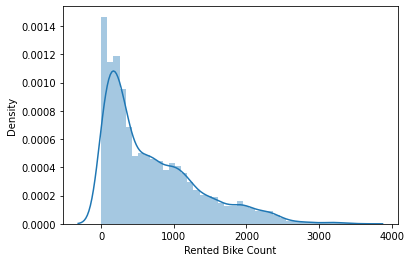

In [ ]:
# Using distplot.
sns.distplot(data['Rented Bike Count'])

**Inference** : The values are distributed in positively skewed fashion.

**Let's try to remove skewness.**

**Taking Log Transfomation**

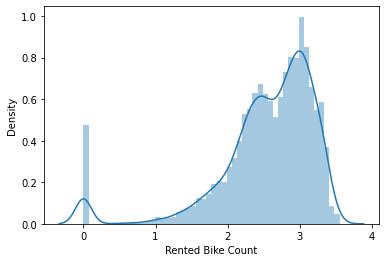

In [ ]:
# Using log transformation with adding 1 for the cases if variable contains 0 to avoid "inf" error.
sns.distplot(np.log10(data['Rented Bike Count']+1))

**Inference** : Taking log transformation for dependent variable , don't help much as now distribution becomes negatively skewed.

**Using Standardization and Normalization techniques.**

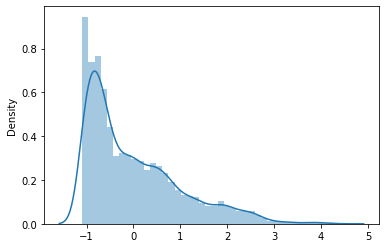

In [ ]:
# Standardization
sns.distplot(StandardScaler().fit_transform(np.array(data['Rented Bike Count']).reshape(-1,1)))

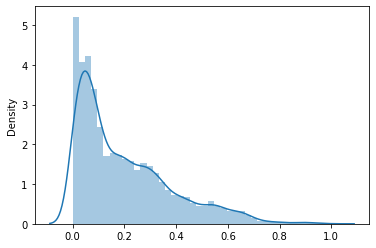

In [ ]:
# Nomalization
sns.distplot(MinMaxScaler().fit_transform(np.array(data['Rented Bike Count']).reshape(-1,1)))

**Inference** : We can see that Standardization and Normalization don't really change the skewness in the distribution.

**Taking Quadratic transformation.**

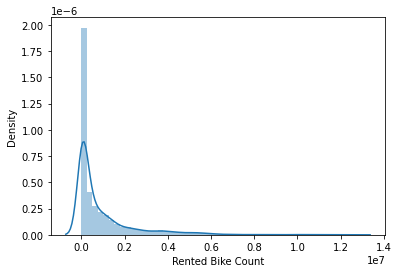

In [ ]:
# Square Transformation
sns.distplot(np.square(data['Rented Bike Count']))

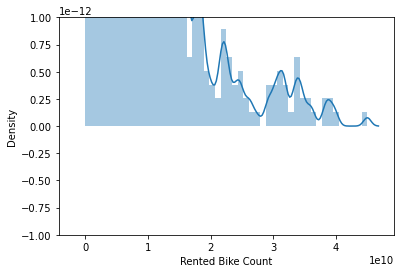

In [ ]:
# Cube Transformation
sns.distplot(np.power(data['Rented Bike Count'],3))

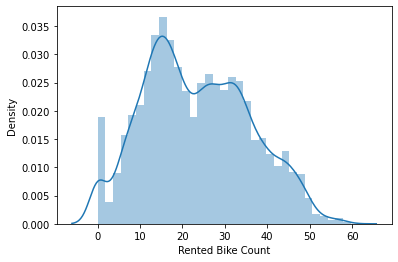

In [ ]:
# Square root transformation
sns.distplot(np.sqrt(data['Rented Bike Count']))

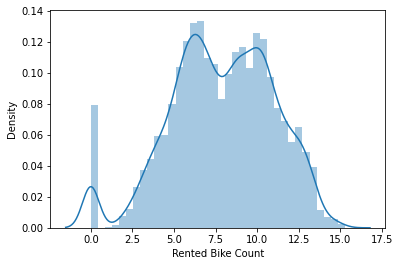

In [ ]:
# Cube root transformation
sns.distplot(np.power(data['Rented Bike Count'],(1/3)))

**Inference** : The square root and cube root transformation removes the skewness but still the variable is not normally distributed. We will use square root transformation for regression as it tansforms the variable with well distributed.

**Note : For regression tasks it is important to standardize the dependent variable as well.**

### **Checking Predictor Variables**

**In the dataset the "date" feature is given , so it is important to match it to the correct dtype.**

In [ ]:
# Date feature
data['Date'][:5]

0    01/12/2017
1    01/12/2017
2    01/12/2017
3    01/12/2017
4    01/12/2017
Name: Date, dtype: object

In [ ]:
# Date feature has "object" dtype . Let's change to correct dtype.
data['Date']=pd.DatetimeIndex(data['Date'])
data['Date'][:5]

0   2017-01-12
1   2017-01-12
2   2017-01-12
3   2017-01-12
4   2017-01-12
Name: Date, dtype: datetime64[ns]

In [ ]:
# Splitting Date into year,month and day
data['year']=data['Date'].dt.year.astype('object')
data['month']=data['Date'].dt.month.astype('object')
data['day']=data['Date'].dt.day.astype('object')

# Dropping 'Date' feature
data.drop('Date',axis=1,inplace=True)

In [ ]:
# Hour Feature
data['Hour'][:5]

0    0
1    1
2    2
3    3
4    4
Name: Hour, dtype: int64

In [ ]:
# The "Hour" feature denotes time so it should has dtype as categorical not integer.
data['Hour']=data['Hour'].astype('object')

**Let's Check Numerical Features.**

In [ ]:
# Numerical features
all_numerical_features=list(data.describe().columns)
print(all_numerical_features)

['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [ ]:
# Removing "Rented Bike Count" as it is dependent variable.
numerical_features=all_numerical_features[1:]
print(numerical_features)
print('='*40)
print("Total Numeric Features : ",len(numerical_features))

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
Total Numeric Features :  8


**Visualizing Numerical Features**

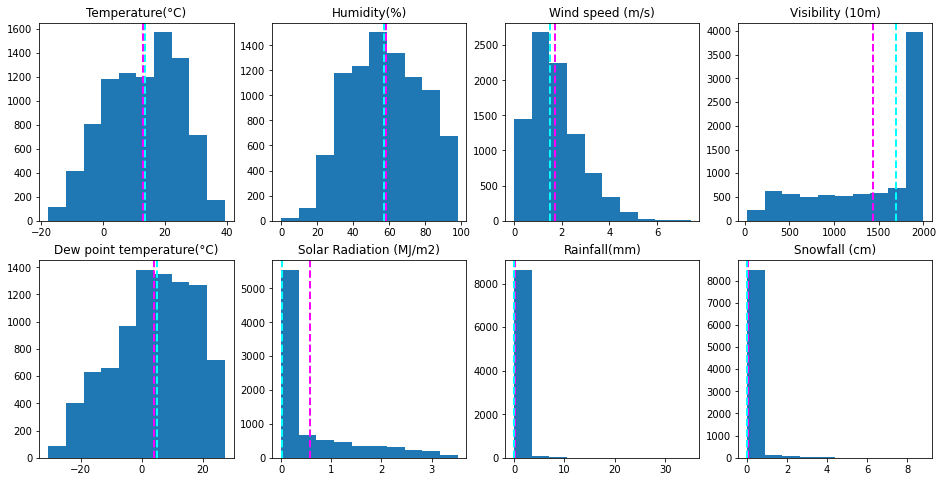

In [ ]:
# Using Histogram for the features.
n=1
plt.figure(figsize=(16,8))
for col in numerical_features:
  feature=data[col]
  # Using Subplots
  plt.subplot(2,4,n)
  plt.hist(feature)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  plt.title(col)
  n+=1
plt.show()

**Inference** : The feature "Solar Radiation" has a high difference between their mean and median , so surely this feature contain outliers. Some features are skewed. Also we will check for outliers for all these features.

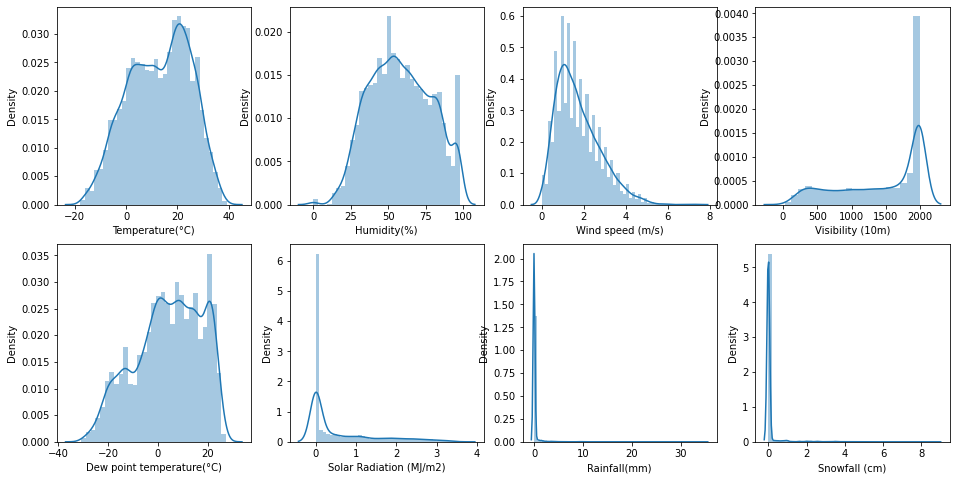

In [ ]:
# Using Distribution plots
n=1
plt.figure(figsize=(16,8))
for col in numerical_features:
  feature = data[col]
  plt.subplot(2,4,n)
  sns.distplot(feature)
  n+=1
plt.show()

**Inference** : The feature "Visibility" is negatively skewed and the features "Wind Speed", "Solar Radiation" ,"Rainfall" and "Snowfall" are positively skewed. So we have to take these things into consideration.

**Let's try to find the solution to fix the skewed features.**

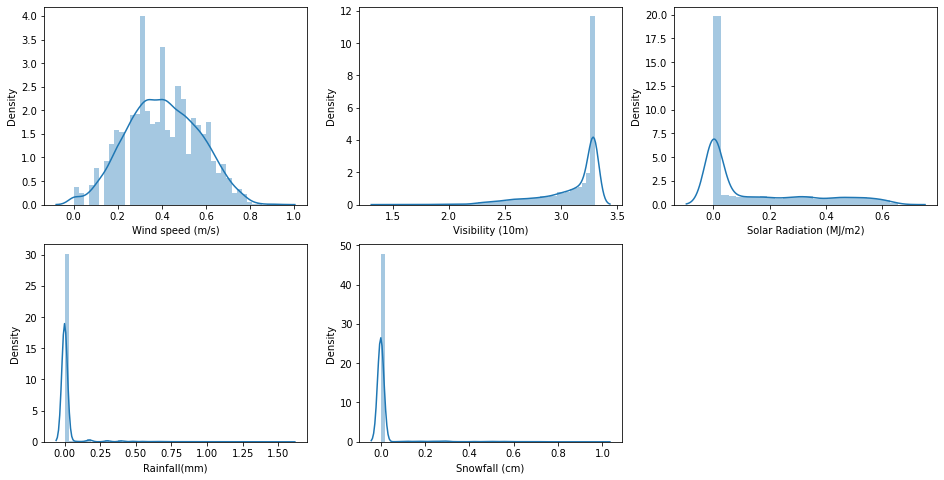

In [ ]:
# Distribution plots of skewed features
# log transformation 
skewed_features=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
n=1
plt.figure(figsize=(16,8))
for col in skewed_features:
  feature = np.log10(data[col]+1)
  plt.subplot(2,3,n)
  sns.distplot(feature)
  n+=1
plt.show()

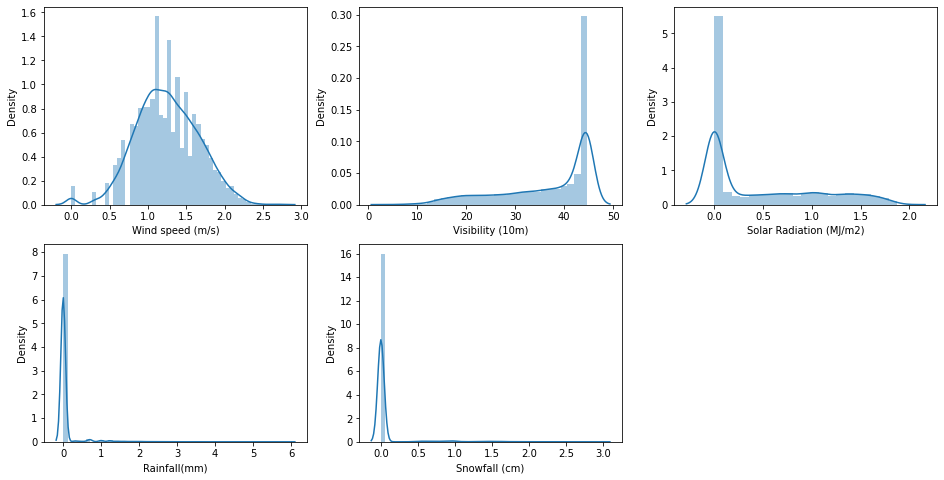

In [ ]:
# Square root transformation 
skewed_features=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
n=1
plt.figure(figsize=(16,8))
for col in skewed_features:
  feature = np.sqrt(data[col])
  plt.subplot(2,3,n)
  sns.distplot(feature)
  n+=1
plt.show()

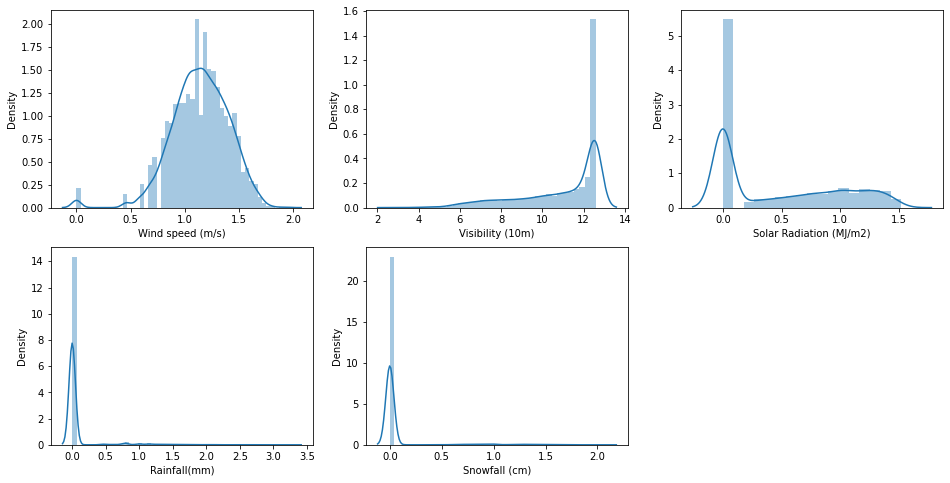

In [ ]:
# Cube root transformation 
skewed_features=['Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
n=1
plt.figure(figsize=(16,8))
for col in skewed_features:
  feature = np.power(data[col],(1/3))
  plt.subplot(2,3,n)
  sns.distplot(feature)
  n+=1
plt.show()

**Inference** : The transformations used not really remove the skewness in most of the features.However skewness from Wind Speed is removed while using square root transformation.

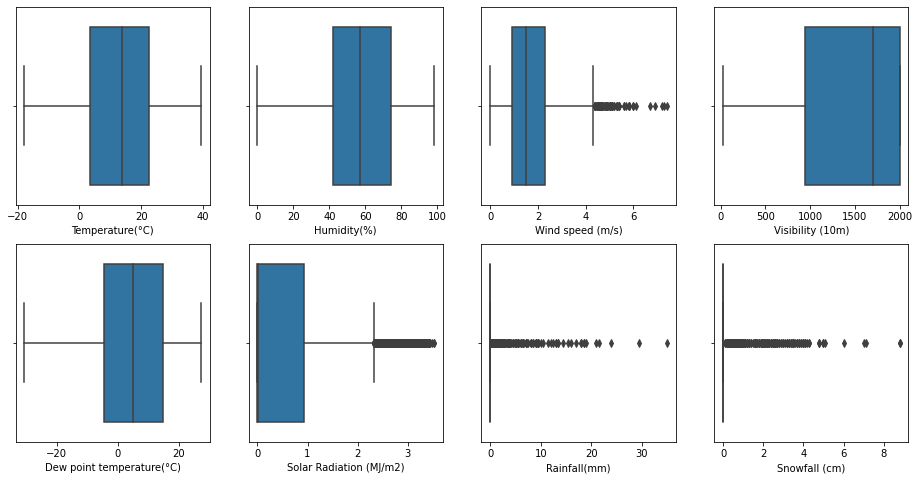

In [ ]:
# Checking for Outliers using Box Plots
n=1
plt.figure(figsize=(16,8))
for col in numerical_features:
  feature = data[col]
  plt.subplot(2,4,n)
  sns.boxplot(feature)
  n+=1
plt.show()

**Inference** : The features "Wind Speed","Solar Radiation","Rainfall","Snowfall" have outliers.

**Let's check the relationship and correlation of each numerical predictor variable with response variable.**

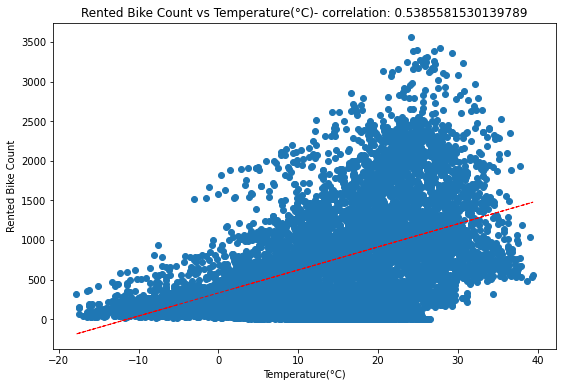

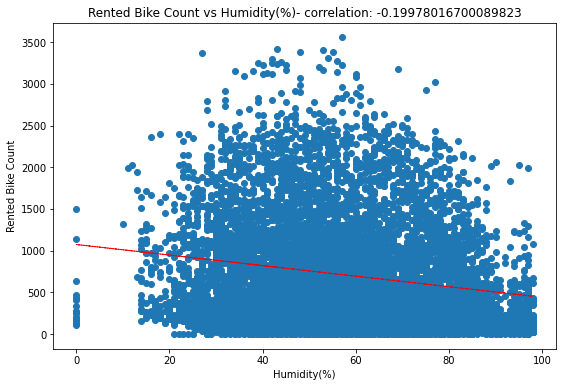

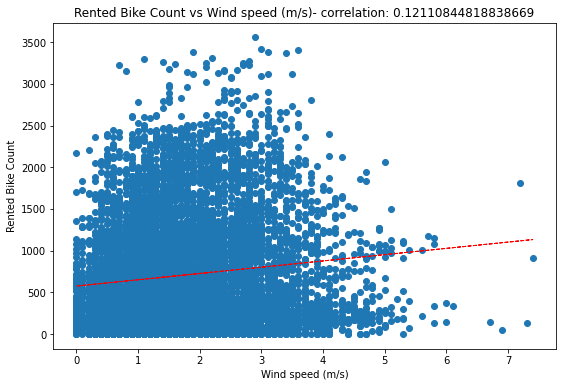

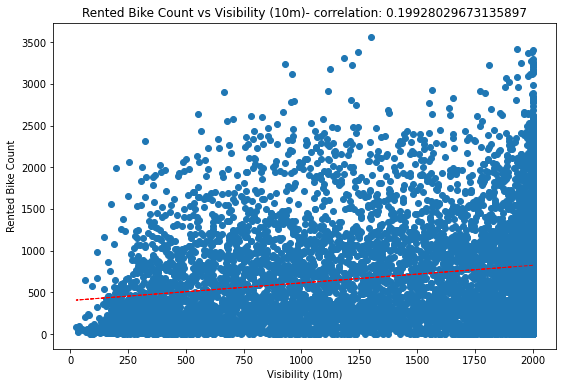

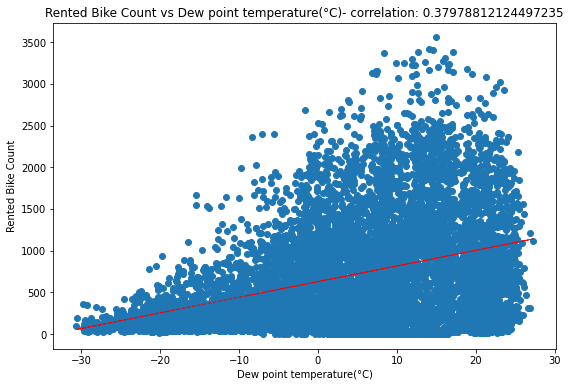

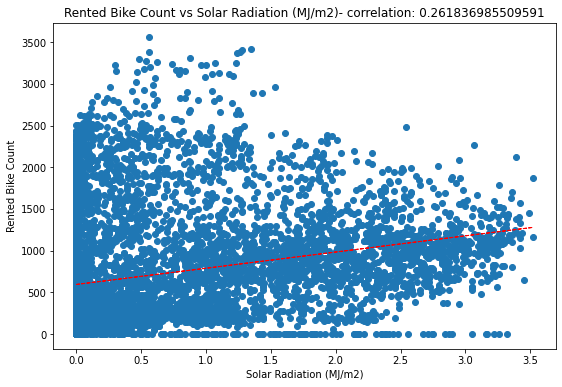

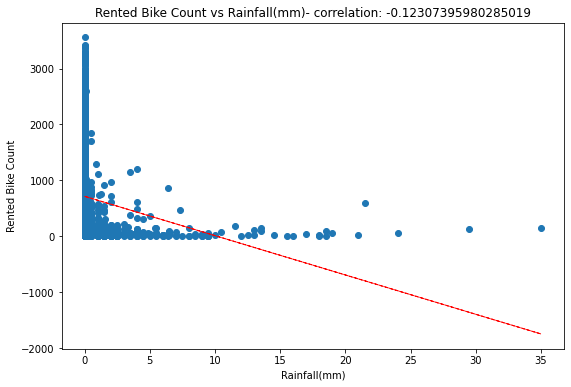

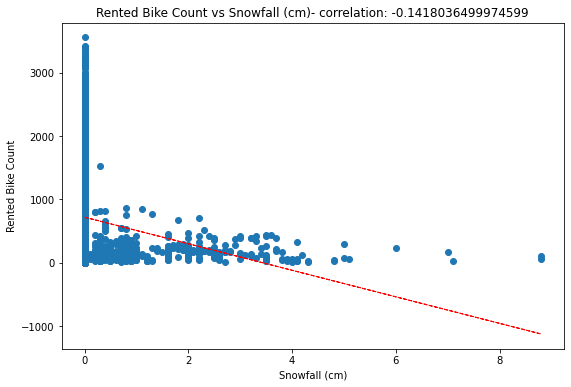

In [ ]:
# Checking relationship and correlation of numerical features with response variable.
label = data['Rented Bike Count']
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    #label = data['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

**Inference** : The features are less correlated with the response variable and don't follow linear relationship.

**Let's Check Correlation among features.**

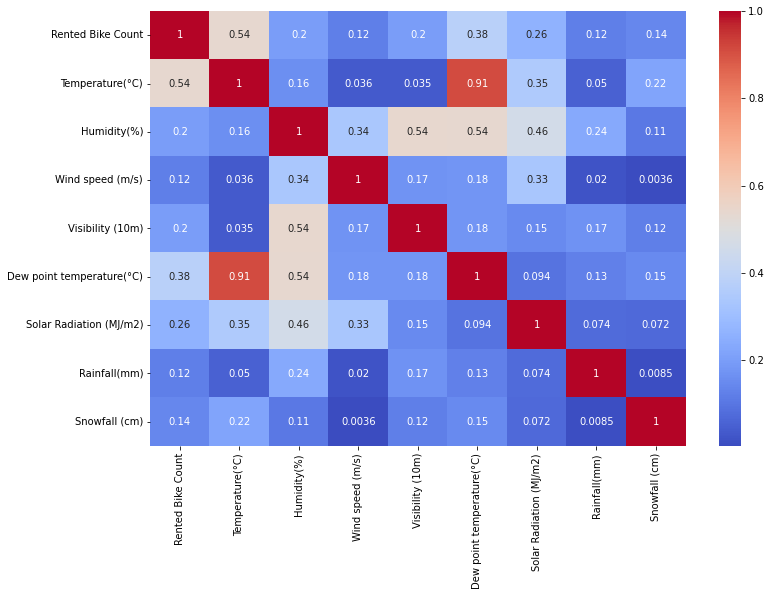

In [ ]:
# Correlation among features.
plt.figure(figsize=(12,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Inference** : The features "Dew point temperature" and "Temperature" are highly correlated with correlation value as 0.91. 

In [ ]:
# Multicollinearity
# Let's check VIF values.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
# VIF values for numerical features.
calc_vif(data[numerical_features])

,variables,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


**Inference** : The features "Dew point temperature" and "Temperature" have high VIF values. 

Let's calculate VIF values by removing "Dew point temperature" feature.

In [ ]:
changed_numerical_features=['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [ ]:
# VIF values for changed numerical features.
calc_vif(data[changed_numerical_features])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


**Inference** : The VIF values significantly decreased for the features "Temperature" and "Visibility" and also VIF values for all numerical features are small now.

**Let's Check Categorical Features.**

In [ ]:
# Categorical features 
categorical_features = list(data.describe(include=['object','category']).columns)
print(categorical_features)

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month', 'day']


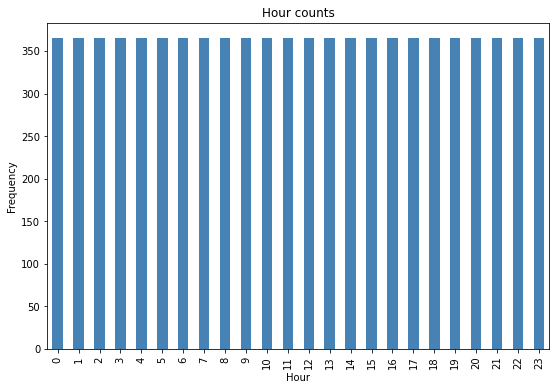

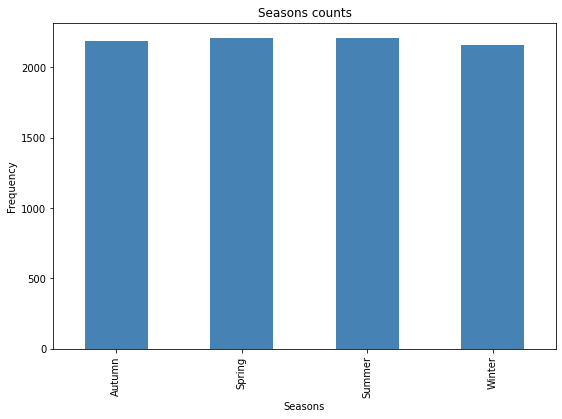

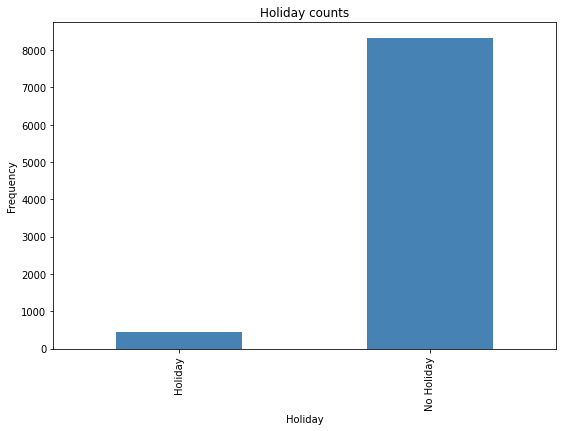

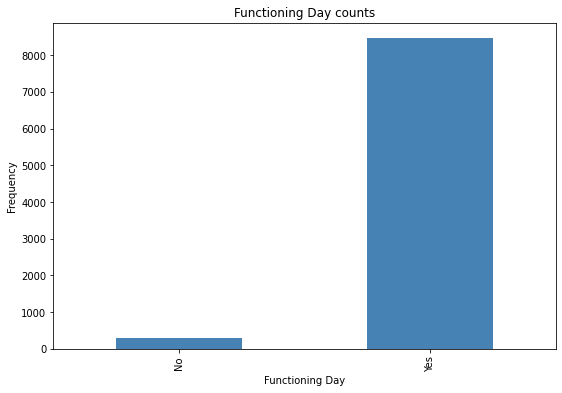

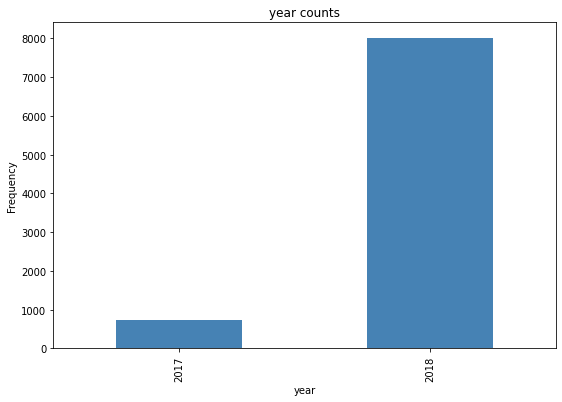

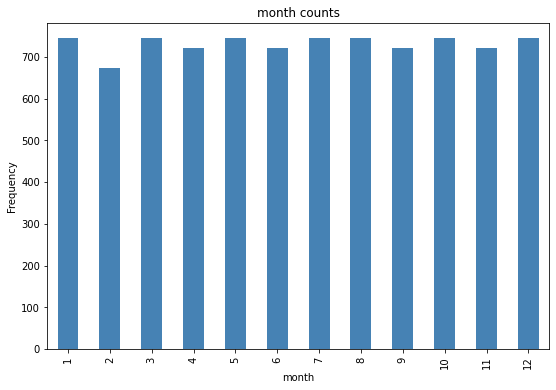

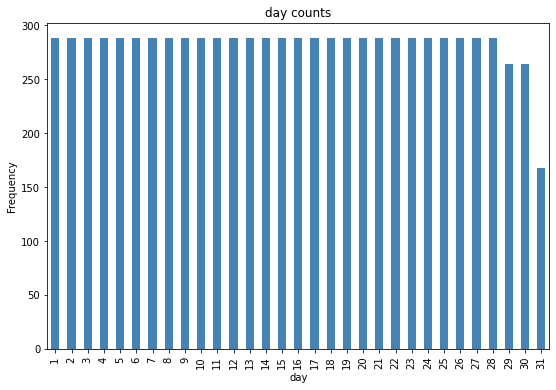

In [ ]:
# Visualising Categorical features
for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

**Inference** :

*   The demand is equal for every hour.
*   The demand is similar for every season.
*   The demand is more when there are no holidays.
*   The demand is more on functioning day.
*   The demand is seen more in the year 2018.
*   For every month demand is similar.
*   The demand is seen similar for each day , except at the month end.








## **Data Preparation before Modelling**

In [ ]:
# Using combination of collinear features to remove collinearity.
data['Temperature']=0.4*data['Dew point temperature(°C)']+0.6*data['Temperature(°C)']

In [ ]:
# Transforming "Wind speed" feature to remove skewness.
data['Wind speed (m/s)']=np.sqrt(data['Wind speed (m/s)'])

In [ ]:
# Transforming response variable before using in regression models.
y=np.sqrt(data['Rented Bike Count'].values)
X=data.drop(['Dew point temperature(°C)','Temperature(°C)','Rented Bike Count'],axis=1)

In [ ]:
# Taking Numerical and Categorical Features.
numerical_features=['Temperature', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
categorical_features = list(data.describe(include=['object','category']).columns)

In [ ]:
# Splitting into train test.
train_set,test_set,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Treating Numerical and Categorical Features Seperately.**

**Transforming Numerical Features.**

In [ ]:
# Scaling Numerical Features.
# Note : Scaling don't change the skewness in our data.
# We have tried other transformation but they are not successfull in removing skewness.
scaler=StandardScaler()

scaler.fit(train_set[numerical_features])
train_numerical=scaler.transform(train_set[numerical_features])
test_numerical=scaler.transform(test_set[numerical_features])

In [ ]:
# Train and Test Numerical Shape.
print('Numerical Train Set Shape :',train_numerical.shape)
print('Numerical Test Set Shape :',test_numerical.shape)

Numerical Train Set Shape : (7008, 7)
Numerical Test Set Shape : (1752, 7)


**Transforming Categorical Features.**

In [ ]:
# Transfoming Categorical Features which are nominal in nature. 
ohe=OneHotEncoder(sparse=False)
ohe.fit(train_set[categorical_features])
train_categorical=ohe.transform(train_set[categorical_features])
test_categorical=ohe.transform(test_set[categorical_features])

In [ ]:
# Train and Test Shape.
print('Categorical Train Set Shape :',train_categorical.shape)
print('Categorical Test Set Shape :',test_categorical.shape)

Categorical Train Set Shape : (7008, 77)
Categorical Test Set Shape : (1752, 77)


Concatenating Transformed Numerical and Categorical Features together.

In [ ]:
# Concatecating the numerical and categorical features together.
X_train=np.concatenate([train_numerical,train_categorical],axis=1)
X_test=np.concatenate([test_numerical,test_categorical],axis=1)

In [ ]:
print('Train Set Shape :',X_train.shape)
print('Test Set Shape :',X_test.shape)

Train Set Shape : (7008, 84)
Test Set Shape : (1752, 84)


**Inference** : The total dimensionality has become 84 after encoding.

## **Metrics to be used**

The problem is to predict the rented bike count , in which it is very important to know what factors will derive the prediction well. So to use following metric for prediction will be a good choice.


*   R2 (R Squared) Score
*   Adjusted R2 Score

But we will also look into other metrics like " Mean Squared Error (MSE) " and
" Root Mean Squared Error (RMSE) " to keep a check how much error is made in prediction.


## **Model Explanablity and Feature Importance**

The job is to predict the rented bike count, so it is very important for the model to explain the reasons for the prediction.
Also it is very important to know which features are more useful for the prediction, so that we can focus on that factors to improve the business model.

## **Modelling**

### **Linear Regression**

In [ ]:
# Importing Linear Model from Sklearn.
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
# Fitting the model.
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculating predictions.
y_pred=regressor.predict(X_test)

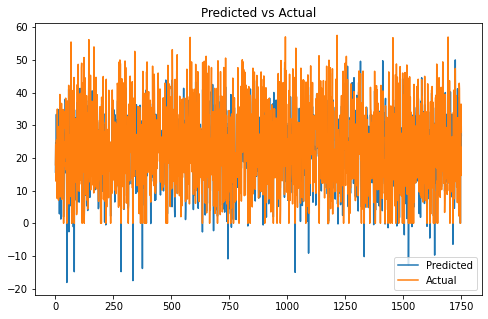

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 34.728615883642355
--------------------------------------------------
Root Mean Squared Error : 5.89309900507724
--------------------------------------------------
R Squared : 0.7794816099762004
--------------------------------------------------
Adjusted R Squared : 0.7683697054998961


**Inference** : The Linear Regression model explains the 77.9 % of the total variability.

### **Lasso Regression**

In [ ]:
# Importing Lasso model from Sklearn.
from sklearn.linear_model import Lasso
lasso=Lasso()

In [ ]:
# Fitting the model.
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
# Calculating Predictions.
y_pred=lasso.predict(X_test)

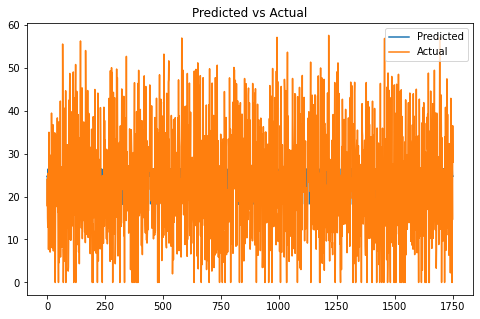

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 133.68145177276952
--------------------------------------------------
Root Mean Squared Error : 11.562069528106528
--------------------------------------------------
R Squared : 0.1511548107835632
--------------------------------------------------
Adjusted R Squared : 0.10838156789563247


The results were not that good compare to Linear Regression. May be we have used the Lasso with default params. Let's select the correct hyperparameters.

In [ ]:
# Hyper Parameter Tuning.
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,50,100]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 50, 100]},
             scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
lasso_regressor.best_params_

{'alpha': 0.001}

In [ ]:
# Fitting the best Lasso Model.
best_lasso=Lasso(alpha=0.001)
best_lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [ ]:
# Calculating Predictions.
y_pred=best_lasso.predict(X_test)

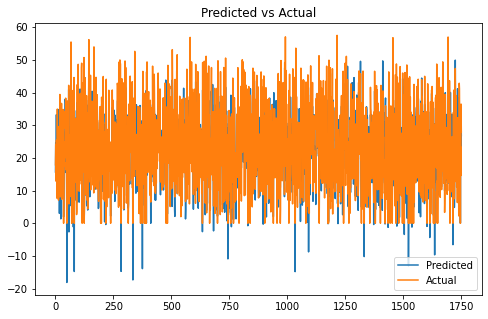

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 34.709549537757205
--------------------------------------------------
Root Mean Squared Error : 5.89148109882033
--------------------------------------------------
R Squared : 0.7796026767043509
--------------------------------------------------
Adjusted R Squared : 0.7684968727710368


**Inference** : The Lasso model shows the results similar to Linear Regression Model.

### **Ridge**

In [ ]:
# Importing Ridge model from Sklearn.
from sklearn.linear_model import Ridge
ridge=Ridge()

In [ ]:
# Fitting the model.
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
# Calculating Predictions.
y_pred=ridge.predict(X_test)

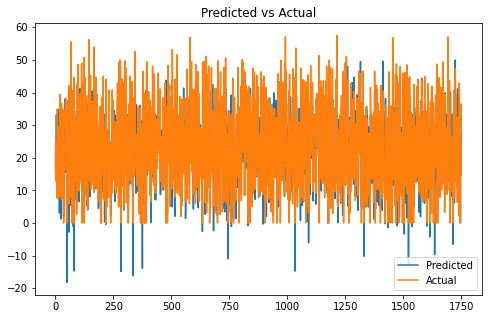

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 34.86897770516061
--------------------------------------------------
Root Mean Squared Error : 5.904995995355171
--------------------------------------------------
R Squared : 0.77859034603969
--------------------------------------------------
Adjusted R Squared : 0.7674335308431297


**Inference** : The Ridge Model shows similar results to Linear Regression Model without hypermeter tuning.

In [ ]:
# Hyper Parameter Tuning.
ridge = Ridge()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,50,100]}
ridge_regressor=GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 50, 100]},
             scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
ridge_regressor.best_params_

{'alpha': 0.1}

In [ ]:
# Fitting the best Ridge Model.
best_ridge=Ridge(alpha=0.1)
best_ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Calculating Predictions.
y_pred=best_ridge.predict(X_test)

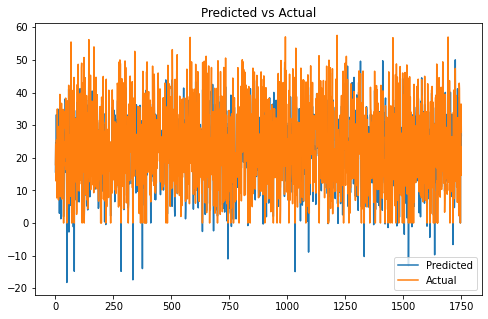

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 34.7163626390524
--------------------------------------------------
Root Mean Squared Error : 5.892059286790349
--------------------------------------------------
R Squared : 0.7795594151435183
--------------------------------------------------
Adjusted R Squared : 0.7684514312635277


**Inference** : Not much difference in results even after Hyper Parameter Tuning.

### **Elastic Net**

In [ ]:
# Importing ElasticNet model from Sklearn.
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [ ]:
# Fitting the model.
elasticnet.fit(X_train,y_train)

ElasticNet()

In [ ]:
# Calculating Predictions.
y_pred=elasticnet.predict(X_test)

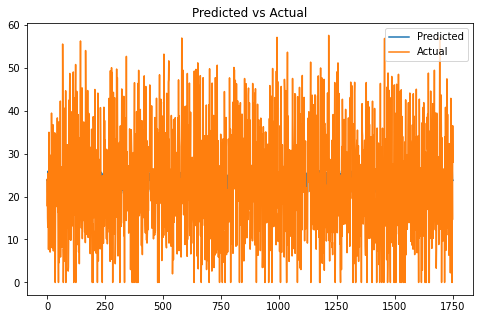

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 138.88276151849192
--------------------------------------------------
Root Mean Squared Error : 11.784853054599022
--------------------------------------------------
R Squared : 0.11812774011121763
--------------------------------------------------
Adjusted R Squared : 0.07369026570770376


**Inference** : The results are worse than simple Linear regression Model.

In [ ]:
# Hyper Parameter Tuning.
elastic = ElasticNet()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,50,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='r2',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 50, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
elastic_regressor.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.8}

In [ ]:
# Fitting the best ElasticNet Model.
best_elasticnet=ElasticNet(alpha=0.0001,l1_ratio=0.8)
best_elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.0001, l1_ratio=0.8)

In [ ]:
# Calculating Predictions.
y_pred=best_elasticnet.predict(X_test)

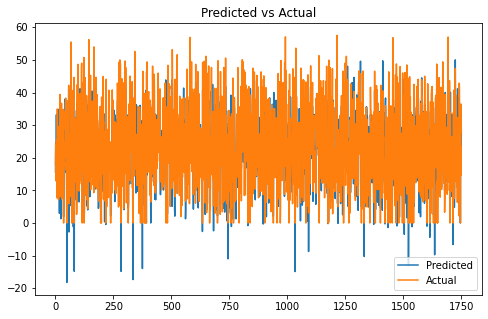

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 34.72298203197678
--------------------------------------------------
Root Mean Squared Error : 5.89262098153078
--------------------------------------------------
R Squared : 0.7795173835844285
--------------------------------------------------
Adjusted R Squared : 0.7684072817374531


**Inference** : The results are simliar to simple Linear Regression.

### **Decision Tree Regressor**

In [ ]:
# Importing Decision Tree Regressor from Sklearn.
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [ ]:
# Fitting the model.
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Calculating Predictions.
y_pred=dt.predict(X_test)

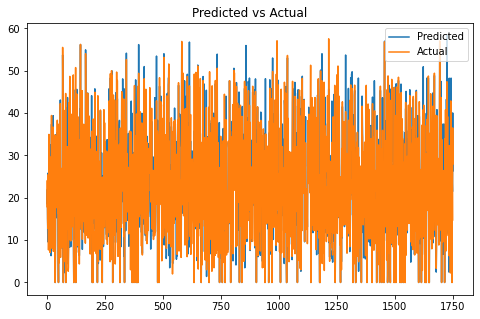

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 29.30774788185356
--------------------------------------------------
Root Mean Squared Error : 5.413663074282843
--------------------------------------------------
R Squared : 0.8139028229692885
--------------------------------------------------
Adjusted R Squared : 0.8045254007313882


**Inference** : The Decision Tree Regressor results are better than the Linear Models. It explains more than 81 % of the total variabiity.

In [ ]:
# Hypermeter Tuning
parameters={'max_depth':[5,10,50,100],'min_samples_split':[5,10,100,500]}
dt=DecisionTreeRegressor()
dt_regressor=GridSearchCV(dt, parameters, scoring='r2',cv=5)
dt_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 50, 100],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
dt_regressor.best_params_

{'max_depth': 50, 'min_samples_split': 100}

In [ ]:
# Fitting the best Decision Tree Regressor Model.
best_dt=DecisionTreeRegressor(max_depth=50,min_samples_split=100)
best_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50, min_samples_split=100)

In [ ]:
# Calculating Predictions.
y_pred=best_dt.predict(X_test)

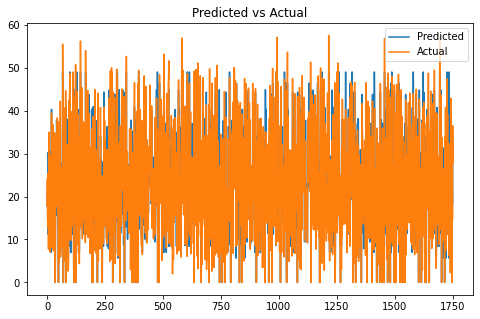

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 25.915599257864628
--------------------------------------------------
Root Mean Squared Error : 5.090736612501636
--------------------------------------------------
R Squared : 0.8354421539863884
--------------------------------------------------
Adjusted R Squared : 0.827150096958708


**Inference** : The Decision Tree Regressor able to explain the 83.5 % of the total variability after hyper parameter tuning.

### **Random Forest Regressor**

In [ ]:
# Importing Random Forest Regressor from Sklearn.
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
# Fitting the model.
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Calculating Predictions.
y_pred=rf.predict(X_test)

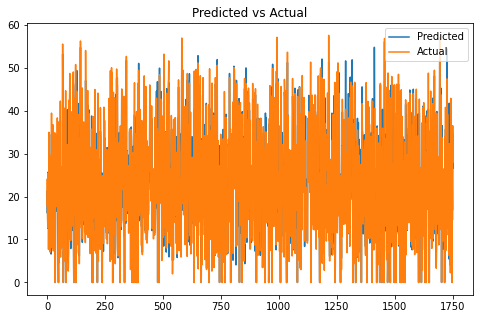

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 17.26003769218156
--------------------------------------------------
Root Mean Squared Error : 4.1545201518564765
--------------------------------------------------
R Squared : 0.8904028960905774
--------------------------------------------------
Adjusted R Squared : 0.8848803065714463


**Inference** : The Random Forest Regressor explains more than 89 % of the total variability.

In [ ]:
# Hyper Parameter Tuning.
parameters = {'n_estimators':[10,50,100,200],'min_samples_split': [2,10,50,80]}
rf=RandomForestRegressor()
rf_regressor=GridSearchCV(rf, parameters, scoring='r2',cv=5,return_train_score=True)
rf_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 10, 50, 80],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
rf_regressor.best_params_

{'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# Fitting the best Random Forest Regressor Model.
best_rf=RandomForestRegressor(n_estimators=200,min_samples_split=2)
best_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
# Calculating Predictions.
y_pred=best_rf.predict(X_test)

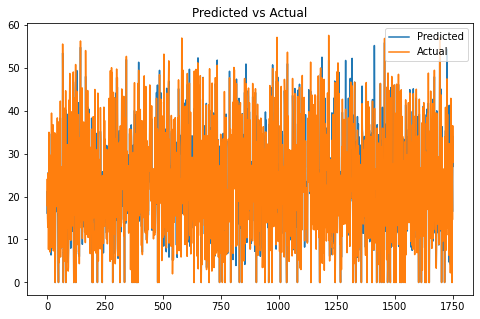

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 17.078533739490798
--------------------------------------------------
Root Mean Squared Error : 4.132618266848609
--------------------------------------------------
R Squared : 0.8915554027025433
--------------------------------------------------
Adjusted R Squared : 0.8860908879017116


**Inference** : The performance improves slightly after Hyper Parameter Tuning. The model able to explain 89.1 % of the total variability.

### **Gradient Boosting Regressor**

In [ ]:
# Importing Gradient Boosting Regressor from Sklearn.
from sklearn.ensemble import GradientBoostingRegressor 
gbm=GradientBoostingRegressor()

In [ ]:
# Fitting the model.
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Calculating Predictions.
y_pred=gbm.predict(X_test)

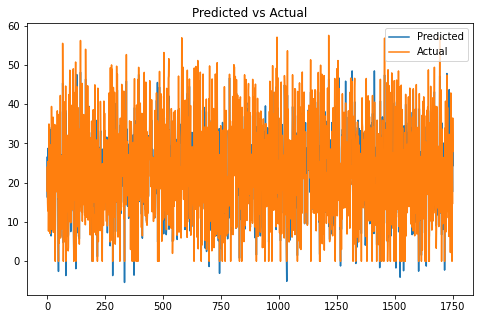

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 24.314265822843687
--------------------------------------------------
Root Mean Squared Error : 4.930949789122141
--------------------------------------------------
R Squared : 0.8456102376256913
--------------------------------------------------
Adjusted R Squared : 0.8378305495396434


**Inference** : The model explains the 84.5 % of the total variability.

In [ ]:
# Hyper Parameter Tuning.
gb=GradientBoostingRegressor()
parameters={'n_estimators':[10,50,100,200],'learning_rate':[0.001,0.01,0.1,0.5]}
gb_regressor=GridSearchCV(gb,parameters,cv=5,scoring='r2')
gb_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
gb_regressor.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [ ]:
# Fitting the best Gradient Boosting Regressor Model.
best_gb=GradientBoostingRegressor(n_estimators=200,learning_rate=0.5)
best_gb.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)

In [ ]:
# Calculating Predictions.
y_pred=best_gb.predict(X_test)

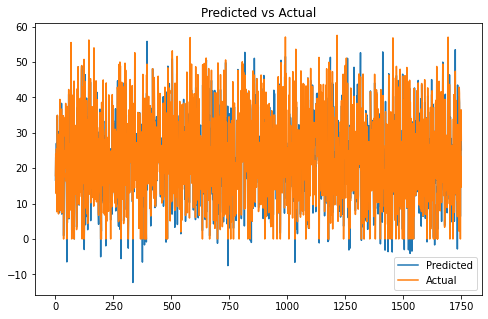

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 17.322314248128237
--------------------------------------------------
Root Mean Squared Error : 4.162008439218767
--------------------------------------------------
R Squared : 0.8900074548815294
--------------------------------------------------
Adjusted R Squared : 0.8844649391107127


**Inference** : The model able to explain 89 % of the total variability after hyper parameter tuning.

### **XGBoost Regressor**

In [ ]:
# Importing XG Boost Regressor from xgboost.
from xgboost import XGBRegressor
xgb=XGBRegressor(verbosity=0) # To remove the warning error, hence "0" for "Silent".

In [ ]:
# Fitting the model.
xgb.fit(X_train,y_train)

XGBRegressor(verbosity=0)

In [ ]:
# Calculating Predictions.
y_pred=xgb.predict(X_test)

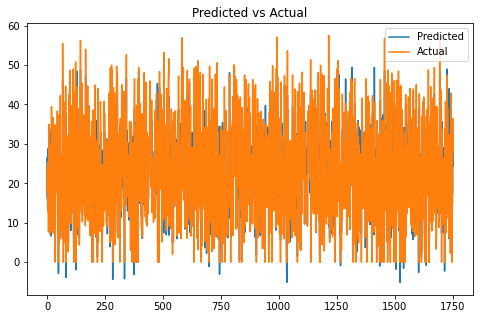

In [ ]:
# Plotting predicted vs actual results.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calculating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 24.44936965009288
--------------------------------------------------
Root Mean Squared Error : 4.944630385589289
--------------------------------------------------
R Squared : 0.8447523606929951
--------------------------------------------------
Adjusted R Squared : 0.8369294442552095


**Inference** : The model explains the 84.4 % of the total variability.

In [ ]:
# Hyper Parameter Tuning.
xgb=XGBRegressor(verbosity=0)
parameters={'n_estimators':[10,50,100,200],'learning_rate':[0.001,0.01,0.1,0.5]}
xgb_regressor=GridSearchCV(xgb,parameters,cv=5,scoring='r2')
xgb_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(verbosity=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='r2')

In [ ]:
# Finding Best Hyper Parameters.
xgb_regressor.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [ ]:
# Fitting the best XG Boost Regressor Model.
best_xgb=XGBRegressor(n_estimators=200,learning_rate=0.5,verbosity=0)
best_xgb.fit(X_train,y_train)

XGBRegressor(learning_rate=0.5, n_estimators=200, verbosity=0)

In [ ]:
# Calculating Predictions.
y_pred=best_xgb.predict(X_test)

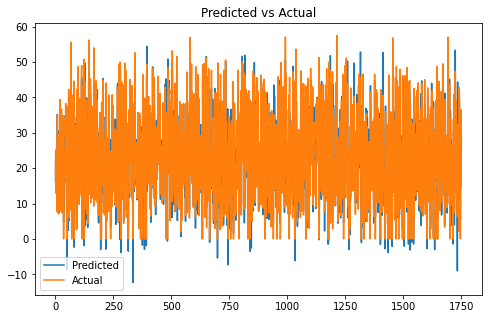

In [ ]:
# Plotting predicted vs actual.
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.title('Predicted vs Actual')
plt.show()

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 16.977352255294658
--------------------------------------------------
Root Mean Squared Error : 4.120358267832381
--------------------------------------------------
R Squared : 0.8921978808845104
--------------------------------------------------
Adjusted R Squared : 0.8867657405091648


**Inference** : The model able to explains the 89.2 % of the total variability after hyper parameter tuning.

## **Models Performance Comparison**

In [ ]:
# Importing PrettyTable for better Visualization.
from prettytable import PrettyTable,ALL
table=PrettyTable(['Model','R2','Adjusted R2'])
table.hrules=ALL
table.add_row(['Linear Regression','0.779','0.768'])
table.add_row(['Lasso (tuned)','0.779','0.768'])
table.add_row(['Ridge (tuned)','0.779','0.768'])
table.add_row(['Elastic Net (tuned)','0.779','0.768'])
table.add_row(['Decision Tree Regressor (tuned)','0.835','0.827'])
table.add_row(['Random Forest Regressor (tuned)','0.891','0.886'])
table.add_row(['Gradient Boosting Regressor (tuned)','0.89','0.88'])
table.add_row(['XGBoost Regressor (tuned)','0.892','0.886'])
print(table)

+-------------------------------------+-------+-------------+
|                Model                |   R2  | Adjusted R2 |
+-------------------------------------+-------+-------------+
|          Linear Regression          | 0.779 |    0.768    |
+-------------------------------------+-------+-------------+
|            Lasso (tuned)            | 0.779 |    0.768    |
+-------------------------------------+-------+-------------+
|            Ridge (tuned)            | 0.779 |    0.768    |
+-------------------------------------+-------+-------------+
|         Elastic Net (tuned)         | 0.779 |    0.768    |
+-------------------------------------+-------+-------------+
|   Decision Tree Regressor (tuned)   | 0.835 |    0.827    |
+-------------------------------------+-------+-------------+
|   Random Forest Regressor (tuned)   | 0.891 |    0.886    |
+-------------------------------------+-------+-------------+
| Gradient Boosting Regressor (tuned) |  0.89 |     0.88    |
+-------

## **Final Selected Model**

The job is to predict the rented bike count in each hour, so for this Random Forest and XGBoost performs best with R2 score as 0.89. But we also have to look model explainability and feature importance into consideration so that we can derive the important factors for predictions and also the reasons for the same to explain and to improve the business model. The Decision Tree performs good with R2 score as 0.835. While the training time complexity of ensemble models is greater than of Decision Tree , the difference between the scores is not that big. The Decision tree gives feature importance easily and ensures model explainability. So the final model selected for the task is Decision Tree.

In [ ]:
# Hyper Tuned DT is used.
final_model_dt=DecisionTreeRegressor(max_depth=50,min_samples_split=100)

In [ ]:
# Fitting the model
final_model_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50, min_samples_split=100)

In [ ]:
# Calculating Predictions
y_pred=final_model_dt.predict(X_test)

In [ ]:
# Calulating Metrics.
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Mean Squared Error :',mse)
print('-'*50)
print('Root Mean Squared Error :',rmse)
print('-'*50)
print('R Squared :',r2)
print('-'*50)
print('Adjusted R Squared :',adj_r2)

Mean Squared Error : 25.915599257864628
--------------------------------------------------
Root Mean Squared Error : 5.090736612501636
--------------------------------------------------
R Squared : 0.8354421539863884
--------------------------------------------------
Adjusted R Squared : 0.827150096958708


In [ ]:
# Calculating Feature Importance.
# Extracting one hot encoded feature names.
ohe_features=list(ohe.get_feature_names_out())
# Concatenating with numerical featyres to get the names of the total features.
features=numerical_features+ohe_features
# Calculating Feature Importance.
feature_importances=final_model_dt.feature_importances_
FI=pd.DataFrame(list(zip(features,feature_importances)),columns=['Features','Feature_Importance'])

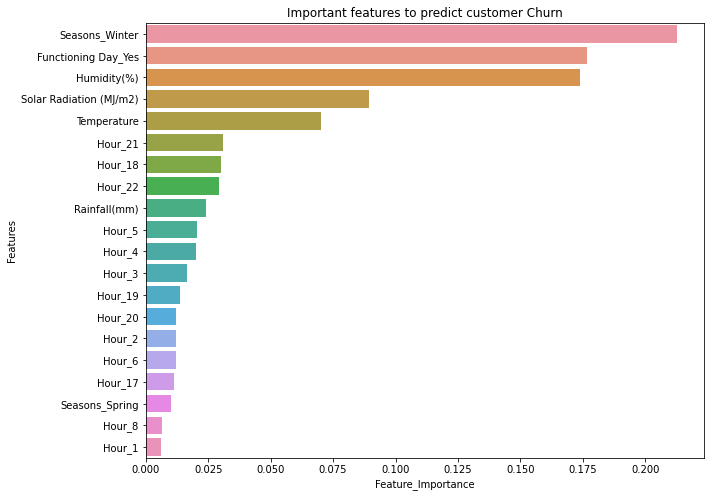

In [ ]:
# Checking Top 20 features which are important for prediction.
# Sorting with respect Feature Importance values.
sorted_FI=FI.sort_values('Feature_Importance',ascending=False)
values = sorted_FI['Feature_Importance'][:20]  
idx = sorted_FI['Features'][:20]
plt.figure(figsize=(10,8))
sns.barplot(y=idx,x=values).set(title='Important features to predict customer Churn')
plt.show()

**Inference** : The "Season" feature as winter is the most important factor for the predictions. The "functioning_day" as yes , and Humidity are the other most important factors. The "Solar Radiation","Temperature" ,"Hour" as a whole feature and "RainFall"are next important factors. So these factors are the most important for the predicitons, therefore we need to focus on them to improve the business model.

**Let's try to understand how model is working.**

In [ ]:
# Understanding Model Prediction Criteria.
from sklearn import tree
print(tree.export_text(final_model_dt,feature_names=features))

|--- Seasons_Winter <= 0.50
|   |--- Functioning Day_Yes <= 0.50
|   |   |--- value: [0.00]
|   |--- Functioning Day_Yes >  0.50
|   |   |--- Humidity(%) <= 1.25
|   |   |   |--- Solar Radiation (MJ/m2) <= -0.65
|   |   |   |   |--- Hour_21 <= 0.50
|   |   |   |   |   |--- Hour_22 <= 0.50
|   |   |   |   |   |   |--- Hour_4 <= 0.50
|   |   |   |   |   |   |   |--- Hour_5 <= 0.50
|   |   |   |   |   |   |   |   |--- Hour_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Hour_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Hour_6 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Hour_6 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [18.55]
|   |   |   |   |   |   |   |   |   |--- Hour_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Seasons_Summer <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Sea

**Inference** : The root node selected is "Seasons_winter" which is the most important feature also. The further splits based on the other top important features.

## **Summary**



*   The job is to predict the number of rented bike counts each hour.
*   The dataset contains a total 14 features in which "Rented Bike Count" is response variable and others are predictor variables.
*   The dataset contains no missing values.
*   The dataset contains a "Date" feature which has an object dtype, we changed the dtype of this feature to correct one.
*   The "Date" feature is splitted to "Year", "Month", and "Day" features for better understanding. 
*   The "Hour" feature has dtype as int , we changed the dtype of this feature to correct one.
*   After modification the dataset has a total eight numerical features and 
seven categorical features.
*   The feature "Visibility" is negatively skewed and the features "Wind Speed", "Solar Radiation" ,"Rainfall" and "Snowfall" are positively skewed. The different transformations are used to remove skewness but only for the feature "Wind Speed", skewness can be removed using square root transformation.
*   The features "Wind Speed","Solar Radiation","Rainfall","Snowfall" have outliers.
*   The features "Dew point temperature" and "Temperature" are highly correlated. So we used the combination of both to remove correlated features from the dataset.
*   Each numerical feature is less correlated with the dependent variable and follows a non-linear relationship.
*   For categorical features , the demand is seen similar for each values of he features "Hour","Season","Month","Day" and the demand is seen more for the features "Holidays" as yes , "Functioning Day" as yes and the "Year" value as 2018.
*   The response variable is positively skewed, so to remove the skewness different transformations are used. The most effective is square root transformation.
*   The numerical features are scaled and categorical features are one hot encoded before passing to the model.
*   The key metrics to be noticed are R2 and adjusted R2.
*   Both Linear and Non Linear Models are used in the task.
*   The Linear Regression, tuned Lasso,Ridge and ELasticNet gives R2 score as 0.779 and adjusted R2 score as 0.768.
*   The Decision Tree Regressor gives R2 score as 0.835 and adjusted R2 score as 0.827.
*   The Random Forest, GradientBoosting, XGBoost Regressors give around R2 as score 0.89 and adjusted R2 score as 0.88.
*   The highest scores can be seen for ensemble models.

## **Conclusions**

*   Taking model explainability and feature importance into account the Decision Tree is selected as final model.The Decision Tree gives R2 score as 0.835.
*   The "Season" feature as winter is the most important factor for the predictions. The "functioning_day" as yes , and Humidity are the other most important factors. The "Solar Radiation","Temperature" ,"Hour" as a whole feature and "RainFall"are the next important factors. So these factors are the most important for the predictions, therefore we need to focus on them to improve the business model.

## **Challenges Faced**



*   The dataset contains skewed predictor variables.
*   The response variable was also skewed.
*   Choosing the right metric was a challenge.
